In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(fits_image_filename)
hdul.info()

Filename: /usr/local/lib/python3.10/dist-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [ ]:
from astropy.io import fits
fits_image_filename = ('/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_063.fits')

hdul = fits.open(fits_image_filename)
hdul.info()

Filename: /content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      80   (1024, 1024)   int16 (rescales to uint16)   


In [ ]:
hdul = fits.open(fits_image_filename)
hdul[0].header
# hdul[0].header[7]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
OBSERVER= 'Ali Takey, Diaa Fouda'                                               
NOTES   = 'BL Lac  '                                                            
DATE_OBS= '2022-01-05'         / Date of observation                            
UT      = '16:24:44.868380'    / Time of Observation                            
EXPTIME = '30.0    '           / Exposure time in seconds                       
CCD_TEMP= '-120.4  '           / Camera temperature                             
FOCUS   = '187674  '           / Telescope focus                                
FILTER  = 'R       '        

In [ ]:
import os
from astropy.io import fits
from astropy.nddata import CCDData

# Set the directory path where the FITS files are located
data_dir = '/content/drive/MyDrive/UNPROCESSED DATA'

# Get a list of all FITS files in the directory
fits_files = [f for f in os.listdir(data_dir) if f.endswith('.fits')]

# Loop through each FITS file and print the information
for fits_file in fits_files:
    # Open the FITS file
    hdu_list = fits.open(os.path.join(data_dir, fits_file))

    # Get the header information
    header = hdu_list[0].header

    # Get the shape of the data
    data_shape = hdu_list[0].data.shape

    # Create a CCDData object
    # ccd = CCDData(hdu_list[0].data, unit=header['BUNIT'])

    # Print the information
    print(f"File: {fits_file}")
    print(f"Number of HDUs (extensions): {len(hdu_list)}")
    print(f"Data shape: {data_shape}")
    # print(f"Data type: {ccd.data.dtype}")
    # print(f"Data unit: {ccd.unit}")
    print(header)
    print()

    # Close the FITS file
    hdu_list.close()

File: 20220105_205.fits
Number of HDUs (extensions): 1
Data shape: (1024, 1024)
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1024                                                  NAXIS2  =                 1024                                                  OBSERVER= 'Ali Takey, Diaa Fouda'                                               NOTES   = 'Landolt G12-43'                                                      DATE_OBS= '2022-01-06'         / Date of observation                            UT      = '00:27:47.950052'    / Time of Observation                            EXPTIME = '0.0     '           / Exposure time in seconds                       CCD_TEMP= '-119.9  '           / Camera temperature                             FOCUS   = '187664  '           / Telesco

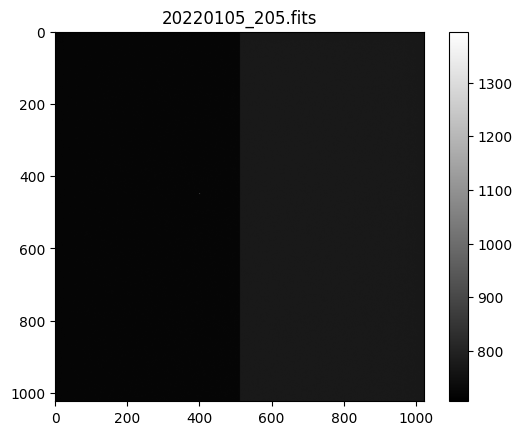

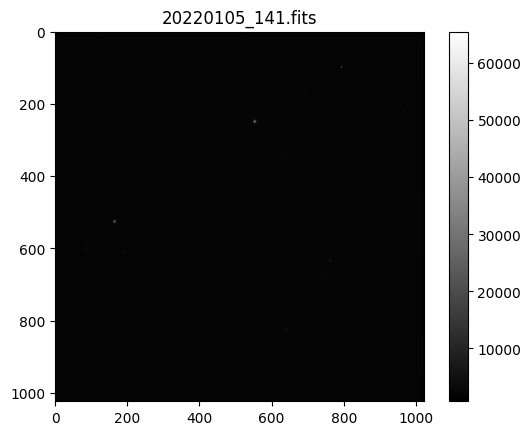

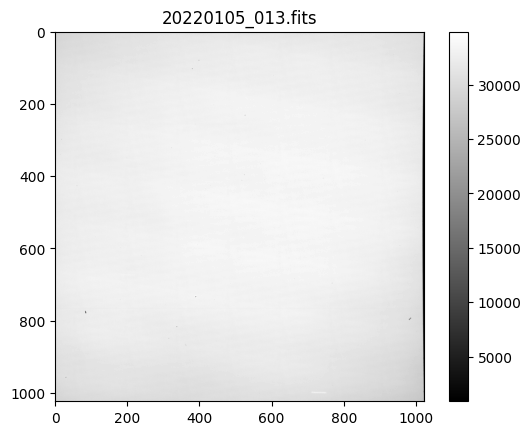

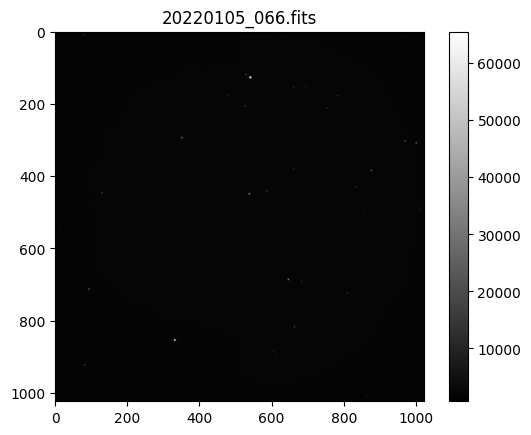

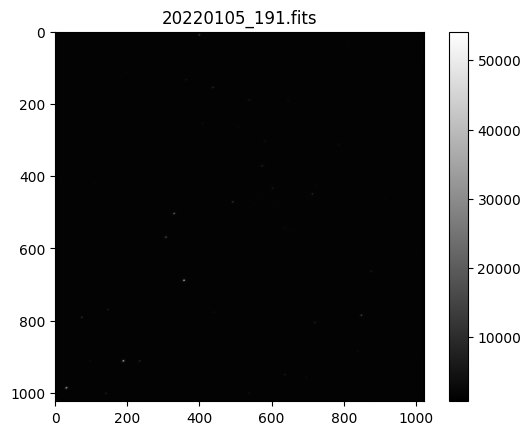

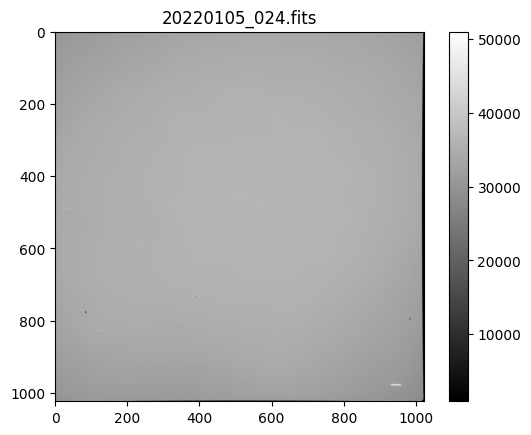

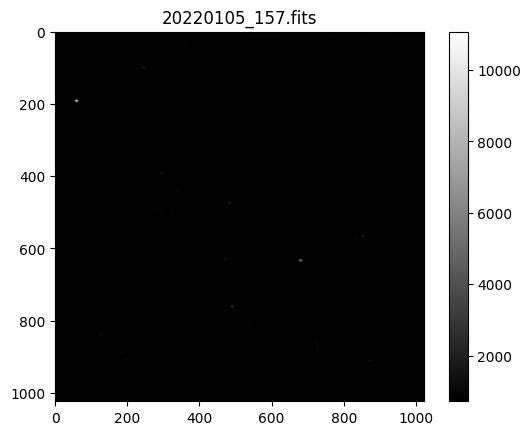

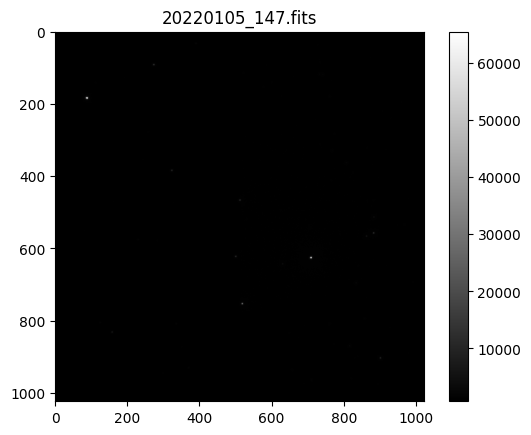

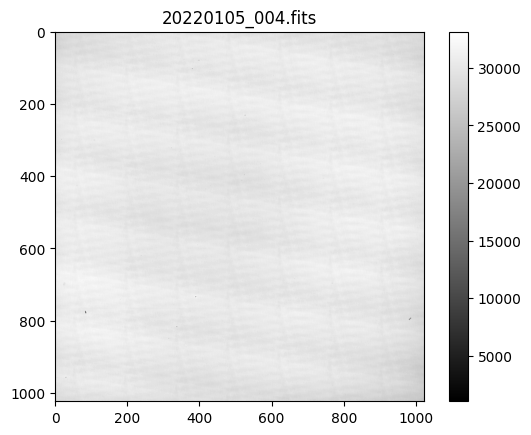

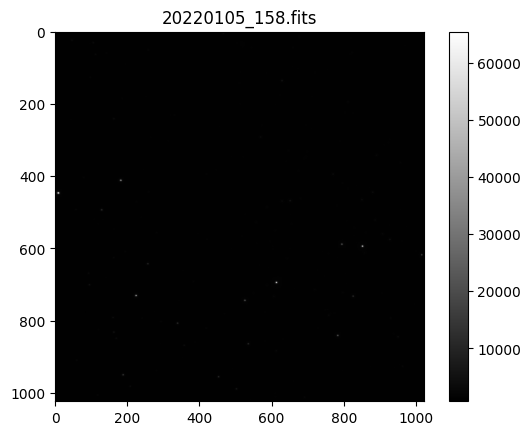

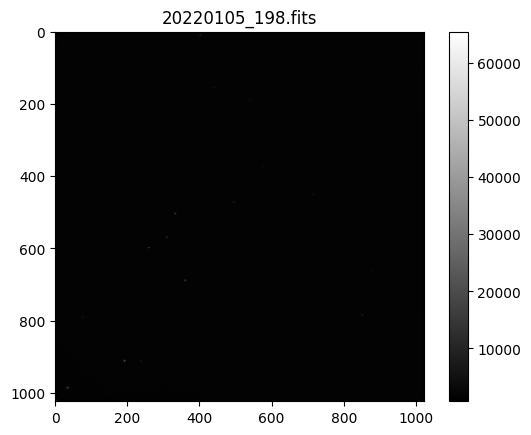

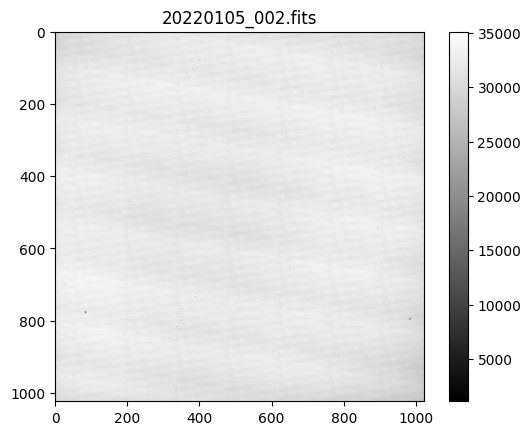

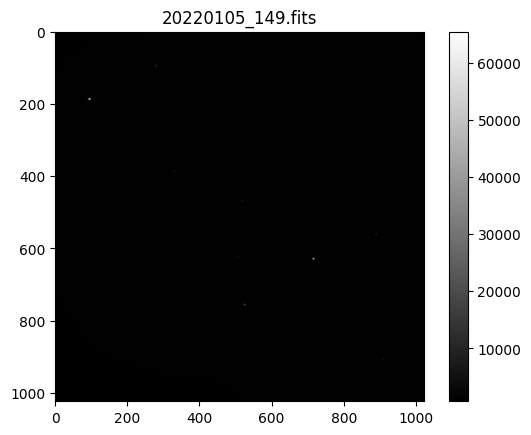

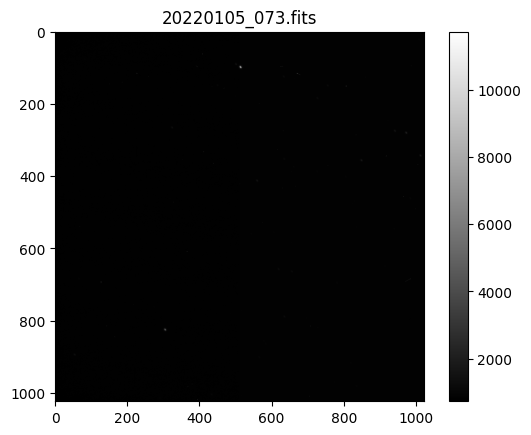

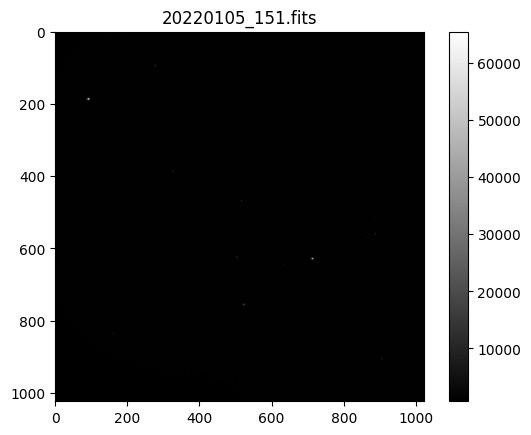

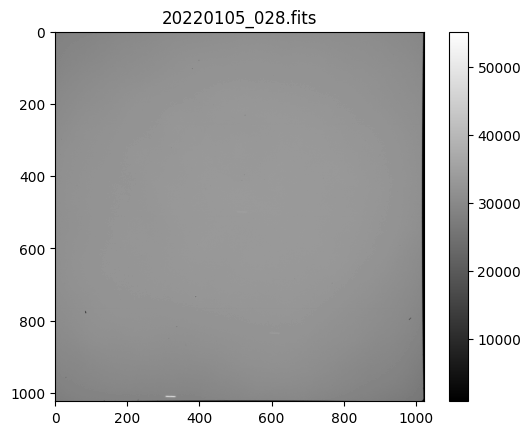

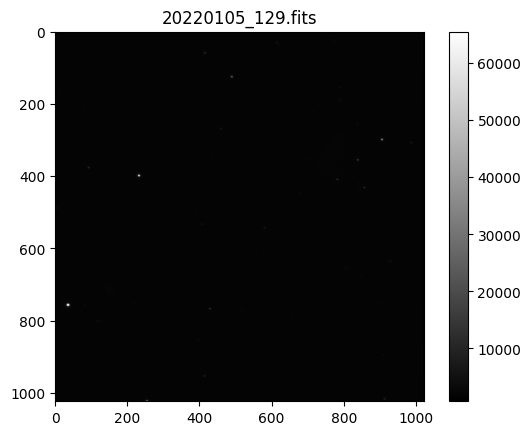

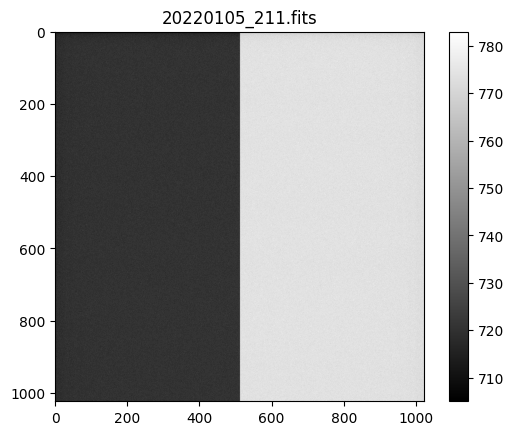

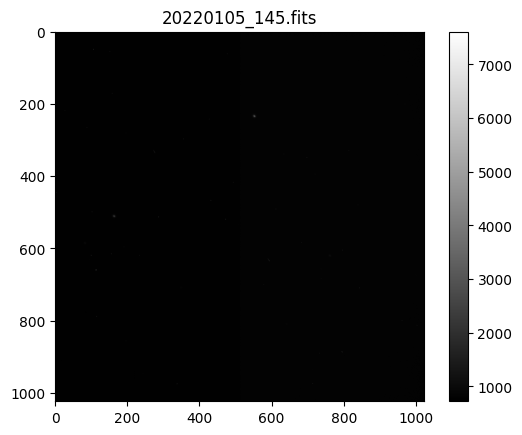

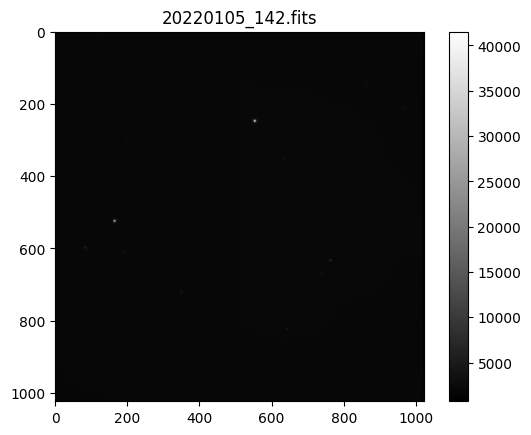

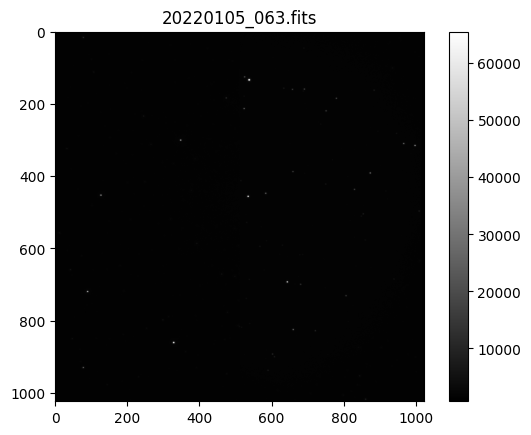

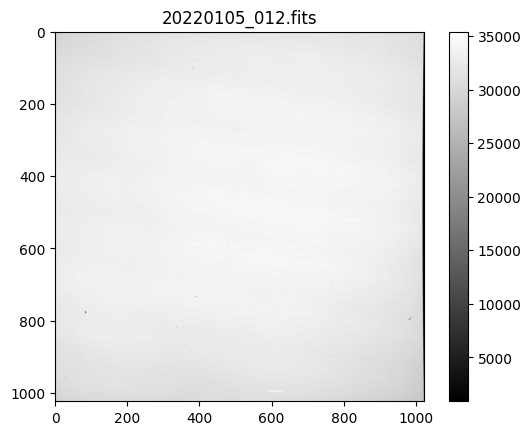

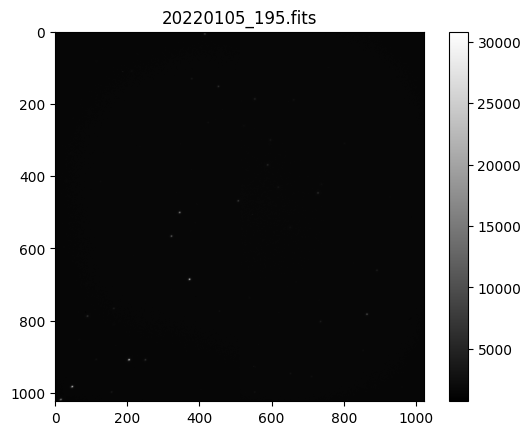

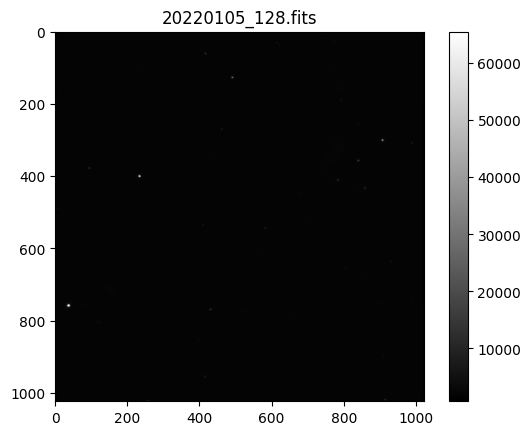

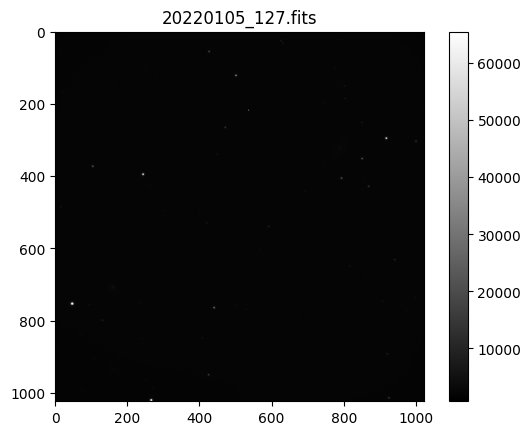

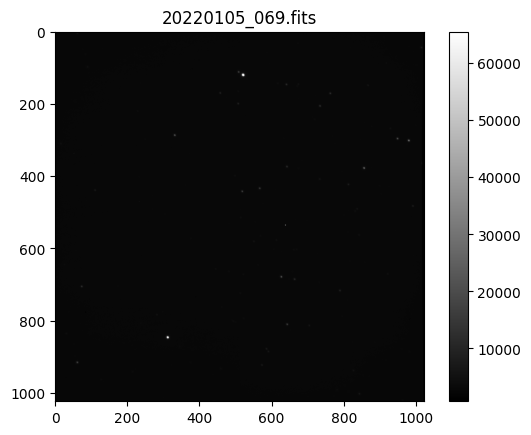

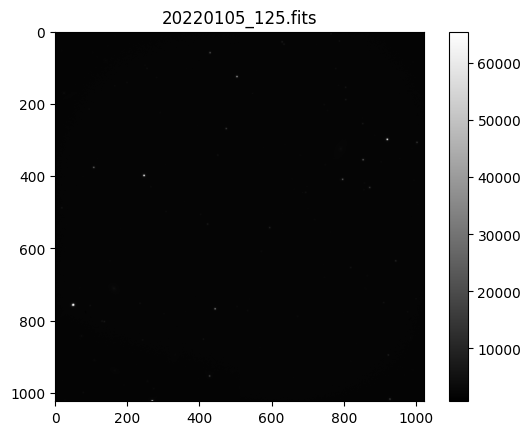

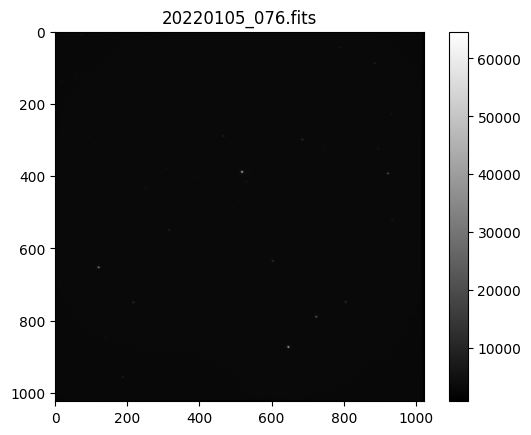

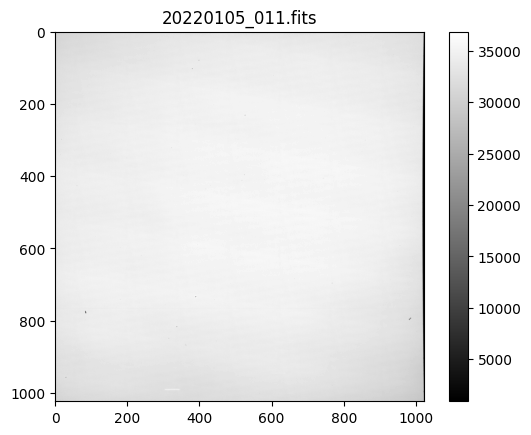

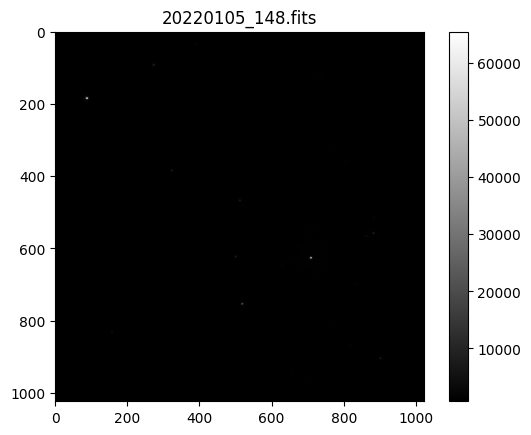

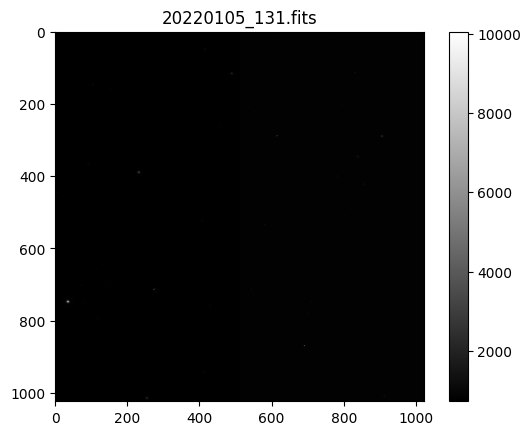

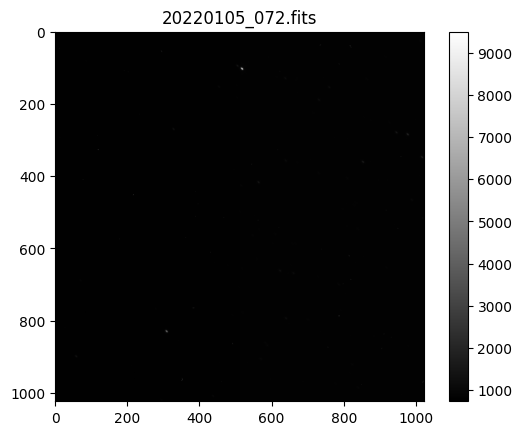

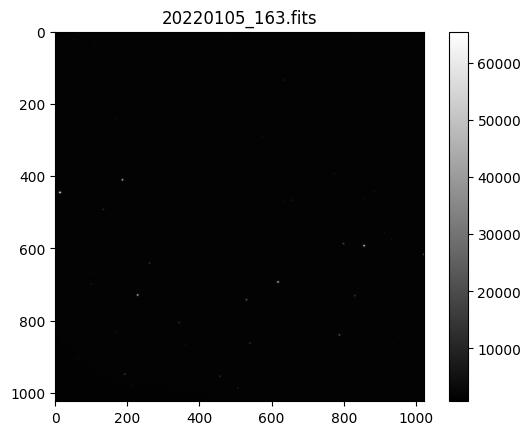

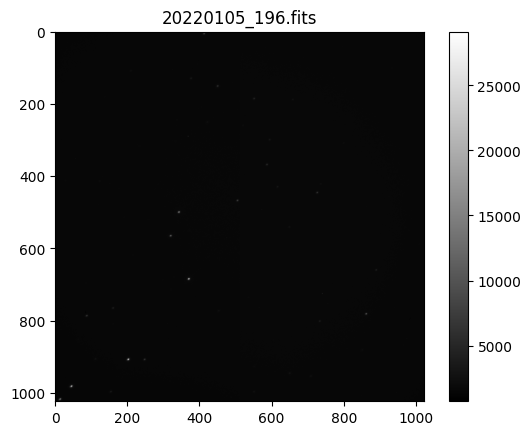

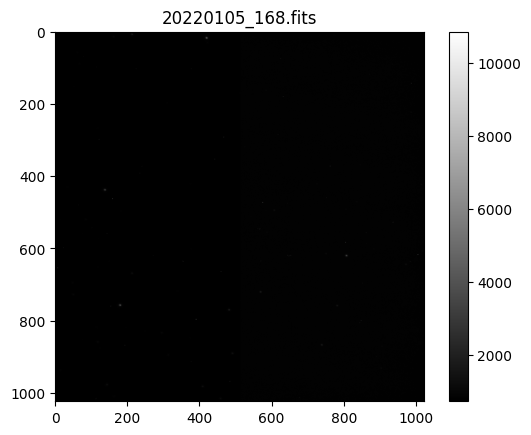

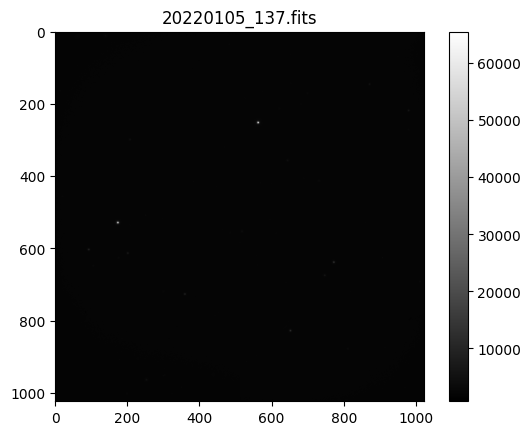

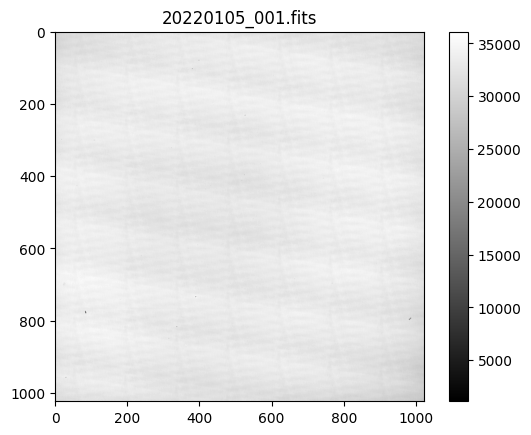

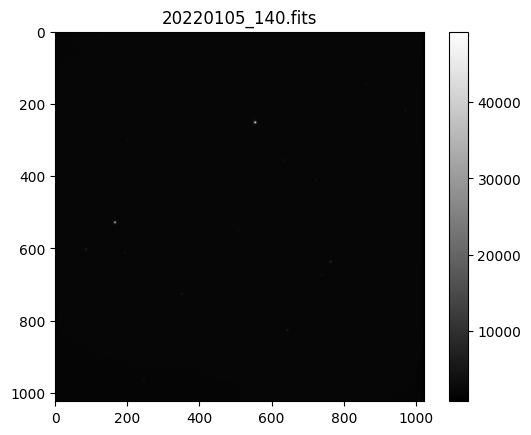

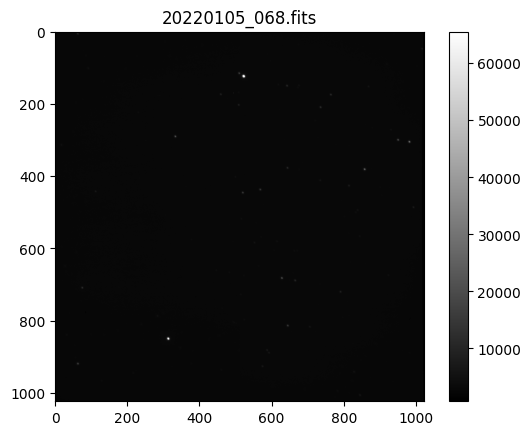

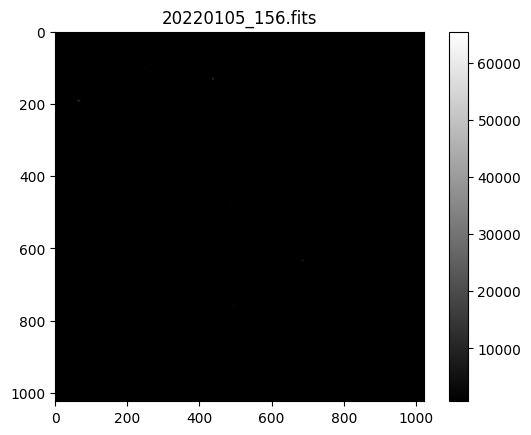

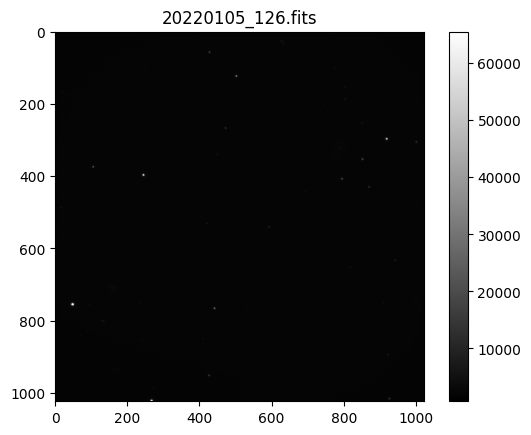

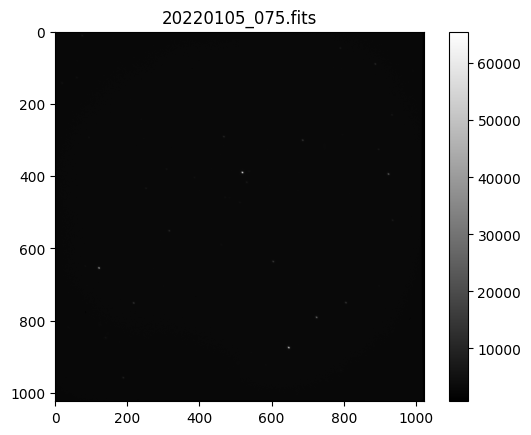

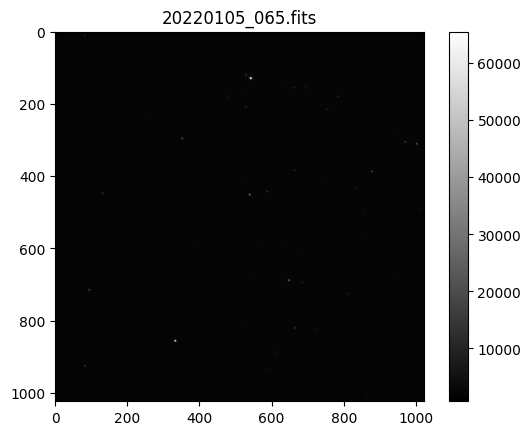

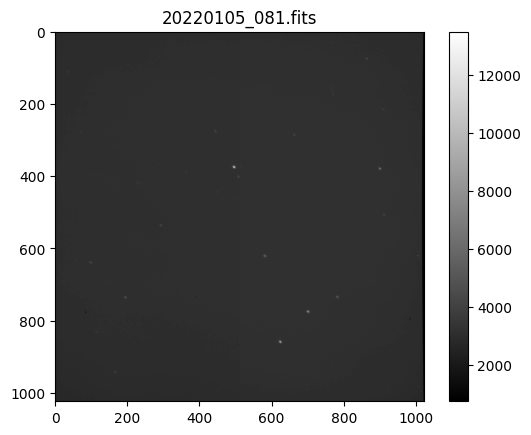

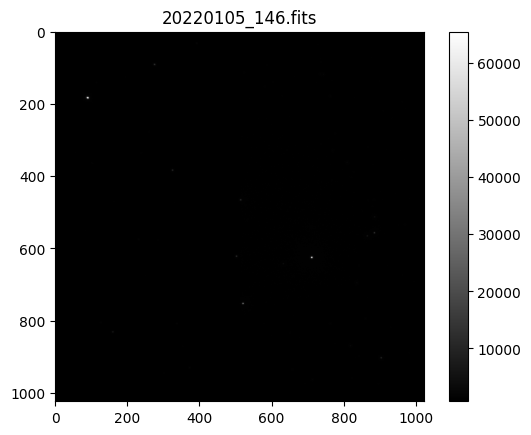

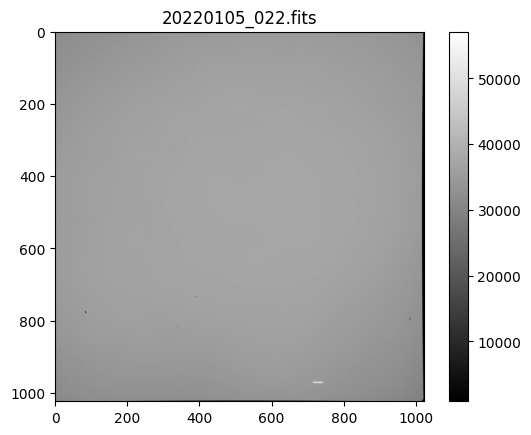

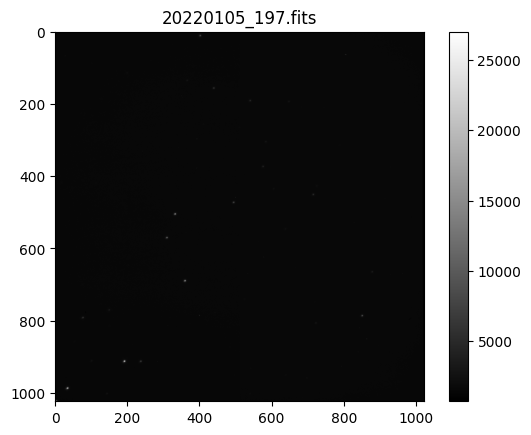

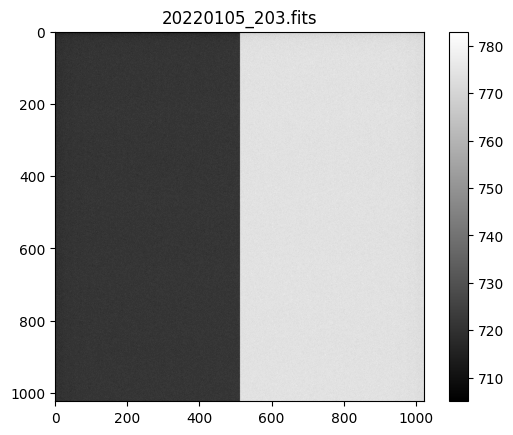

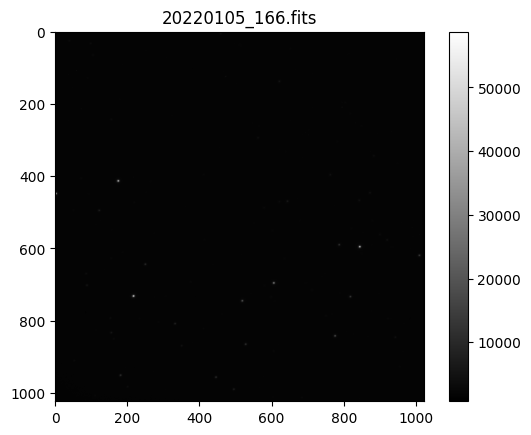

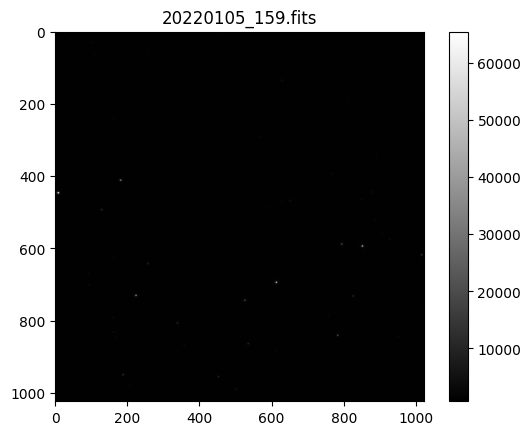

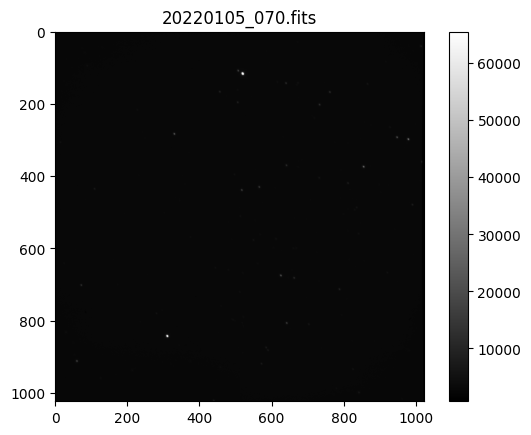

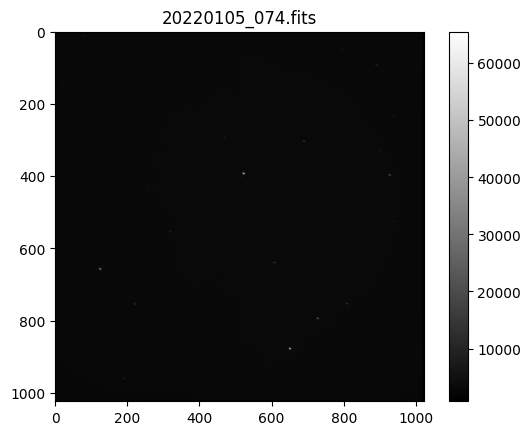

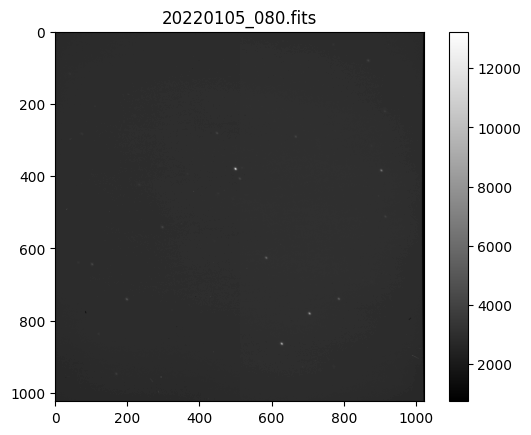

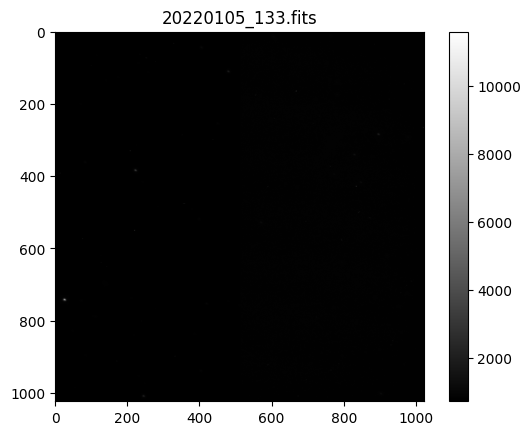

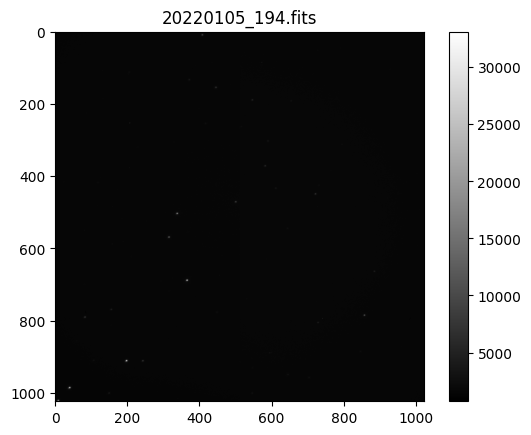

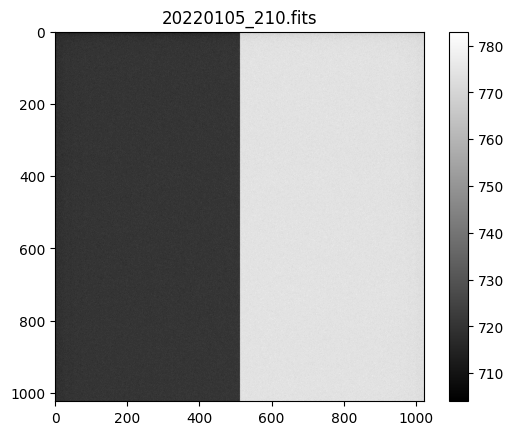

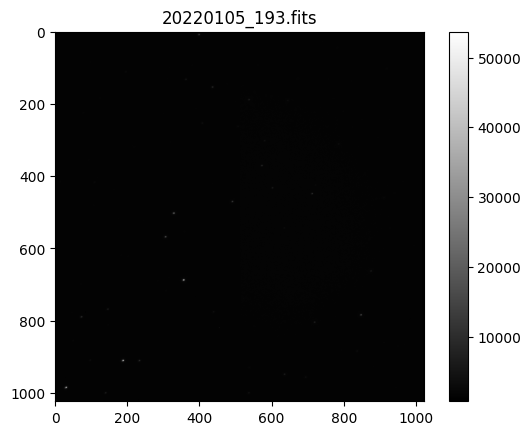

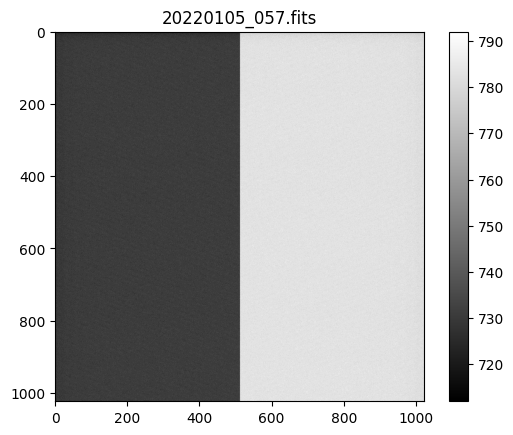

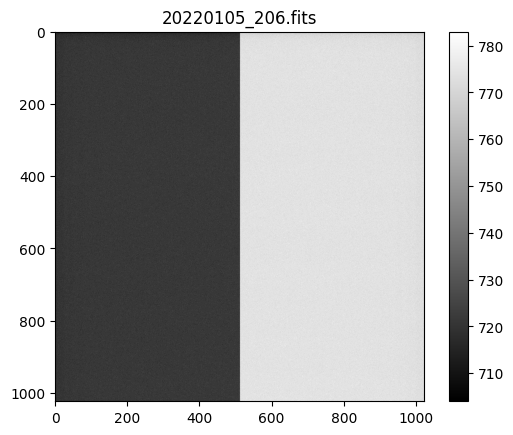

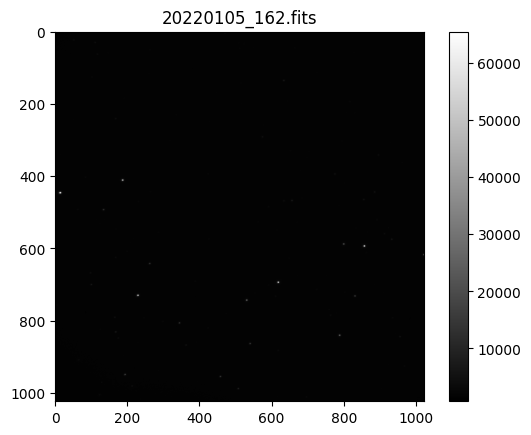

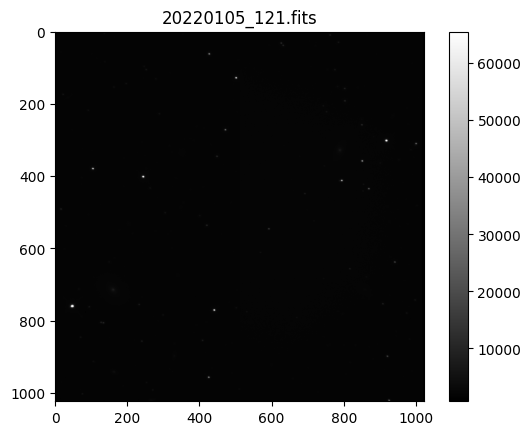

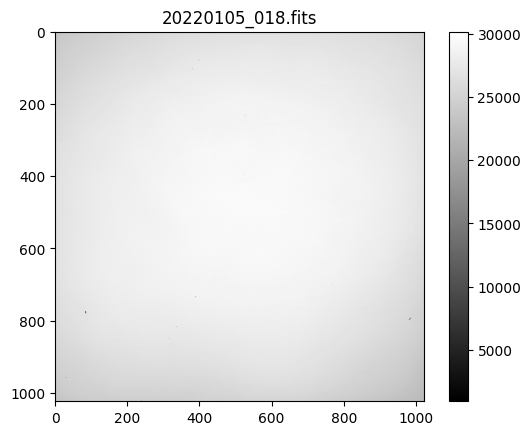

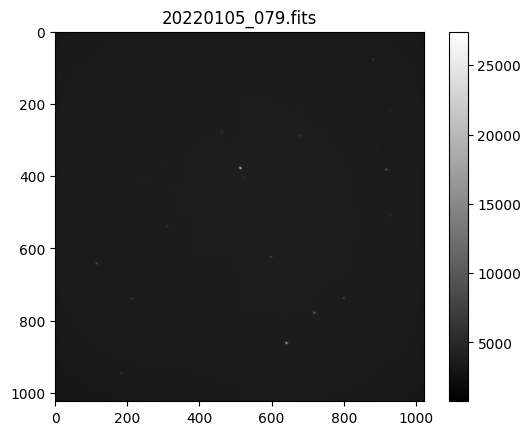

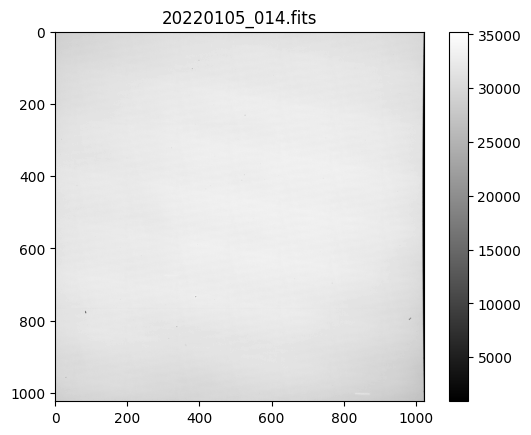

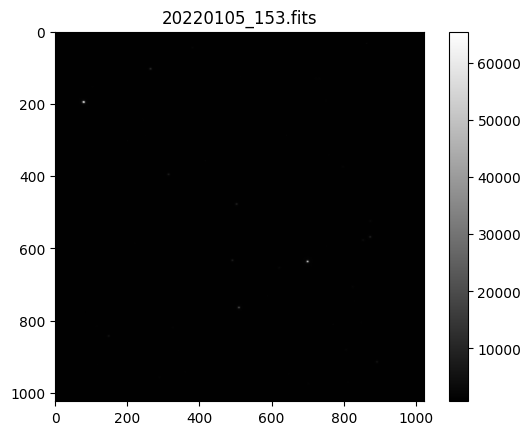

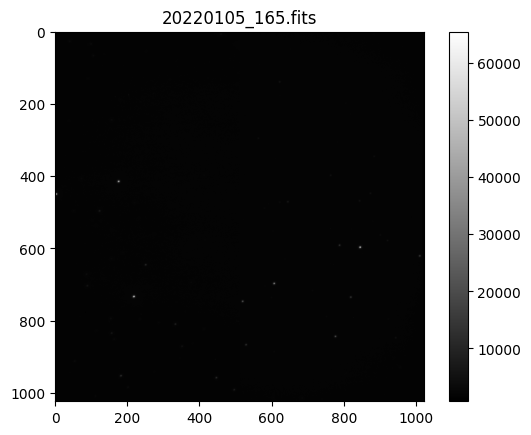

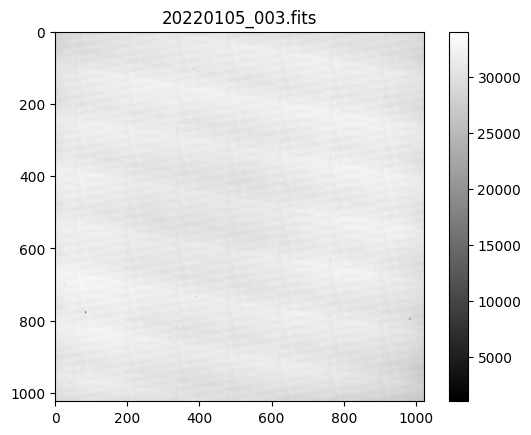

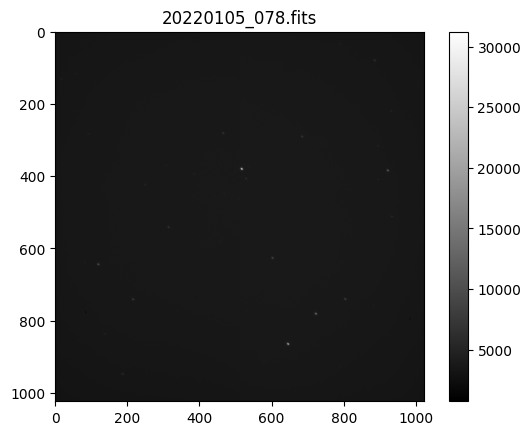

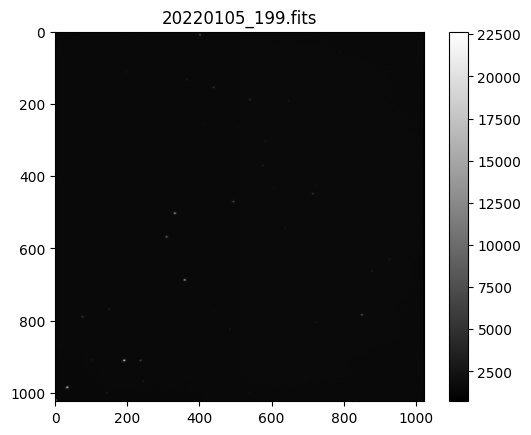

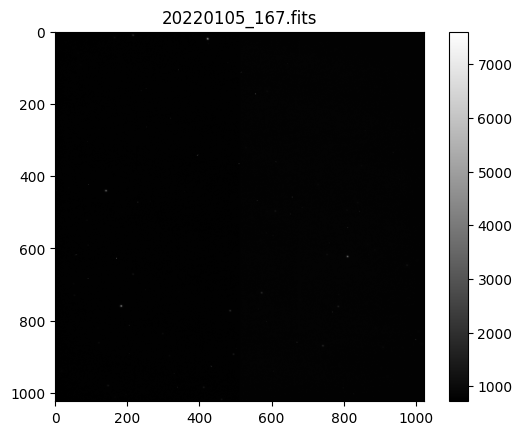

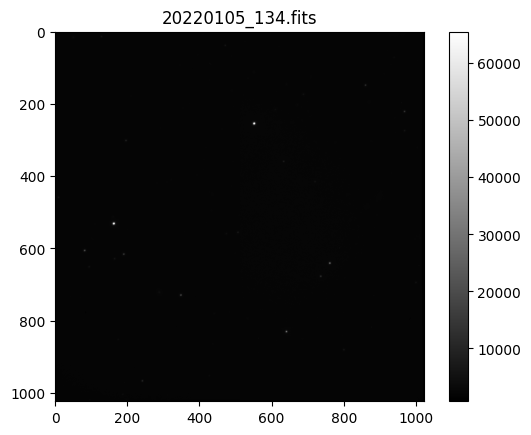

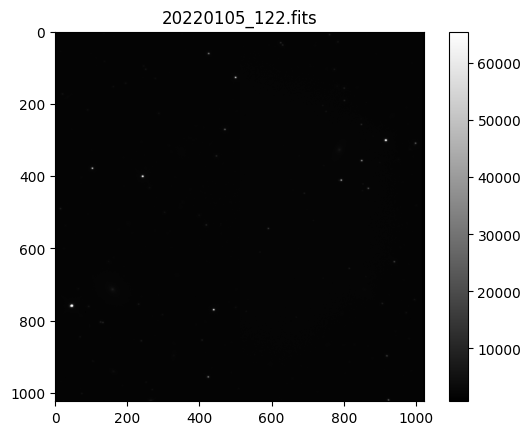

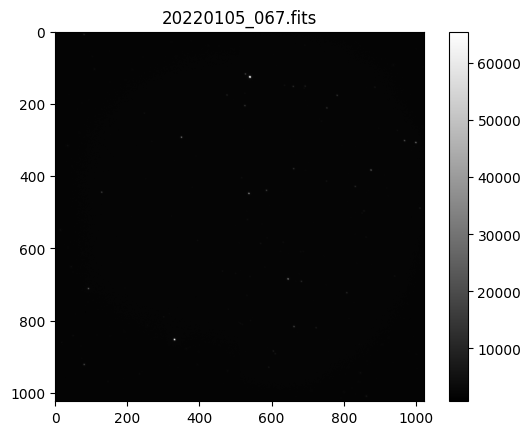

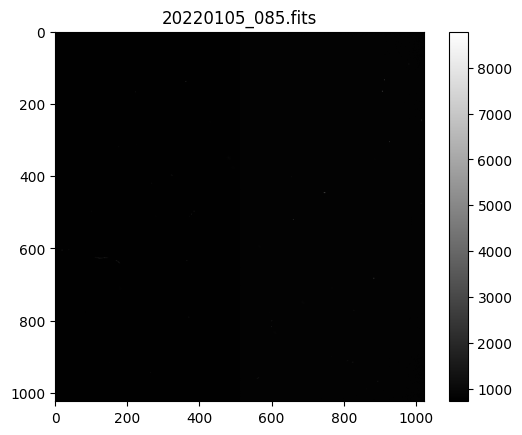

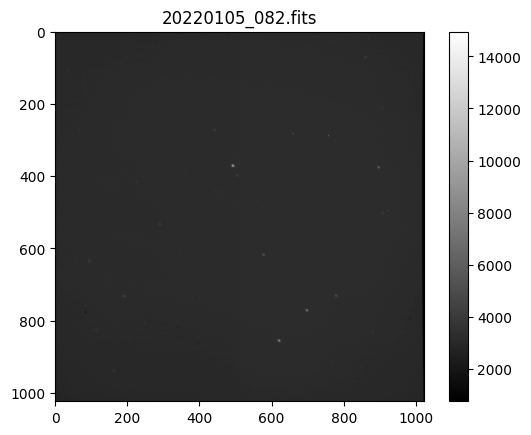

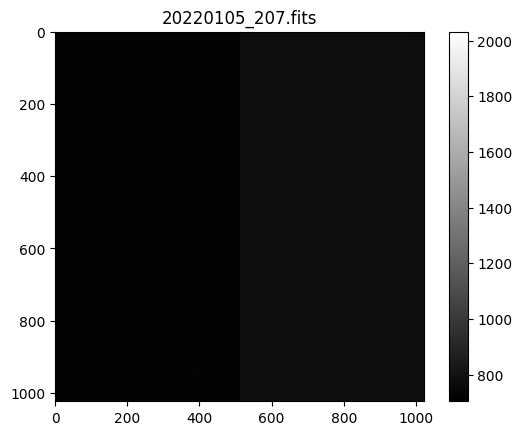

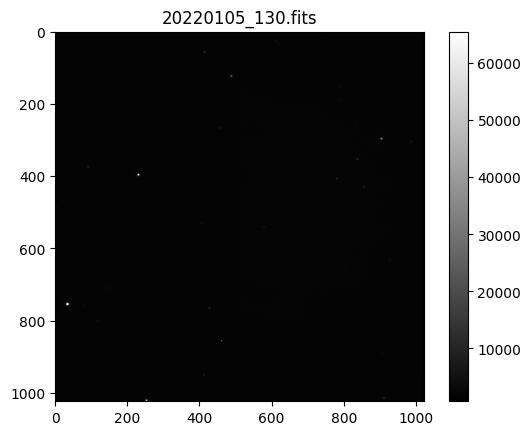

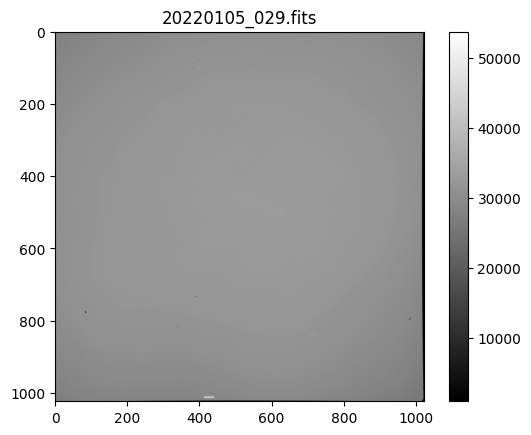

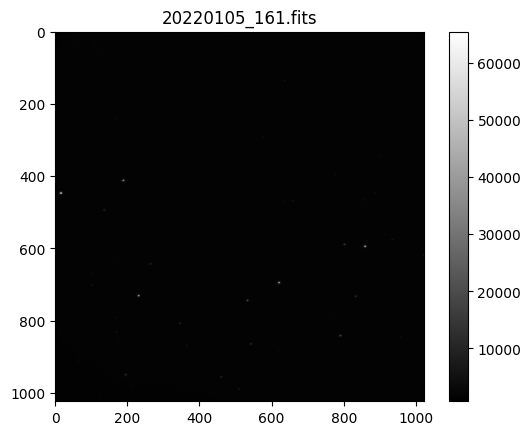

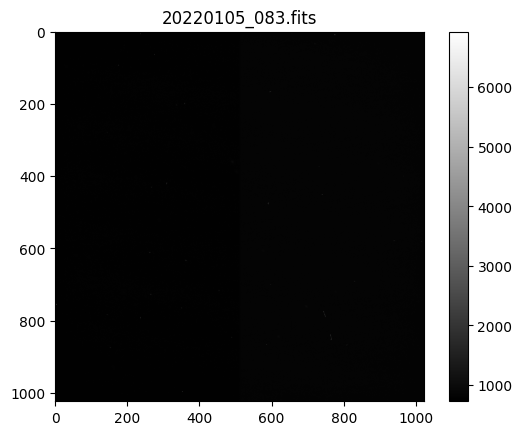

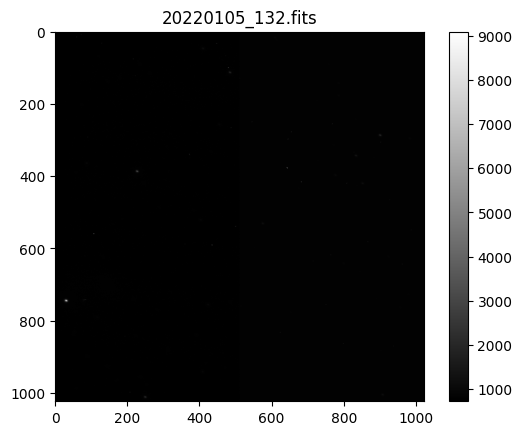

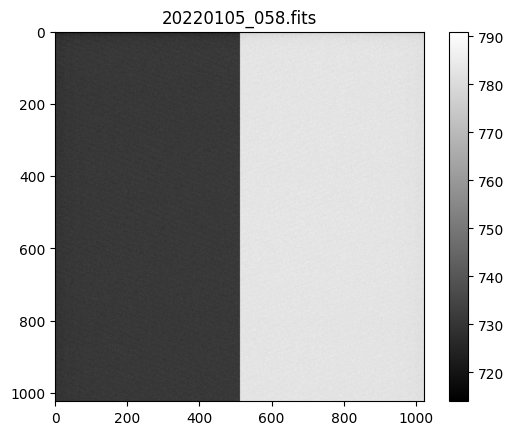

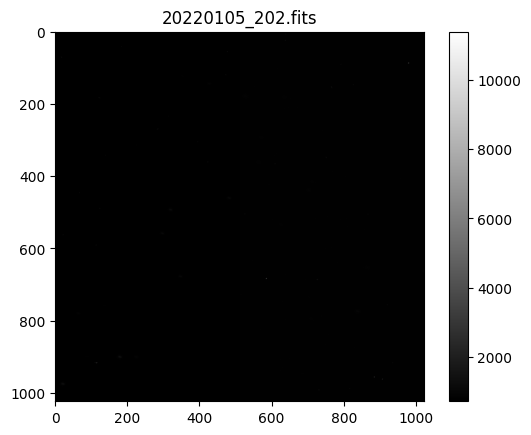

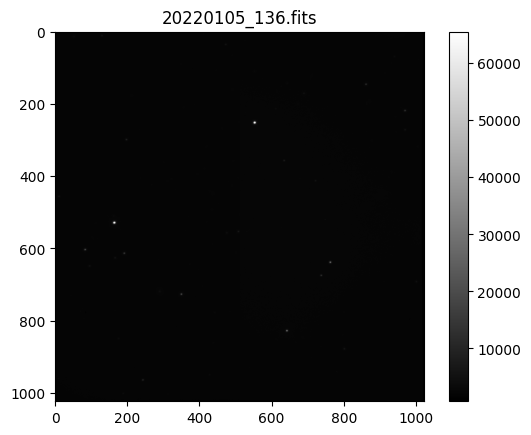

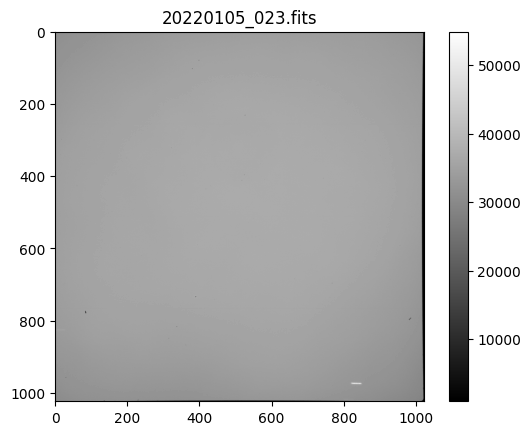

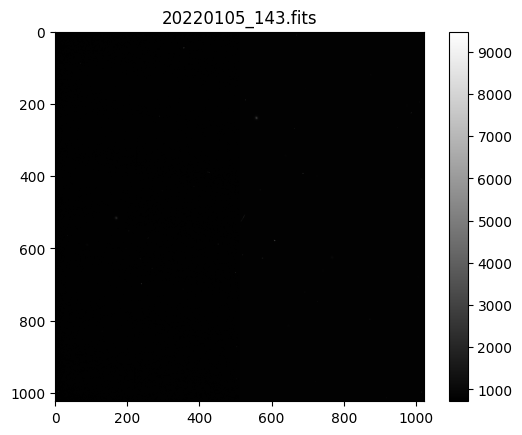

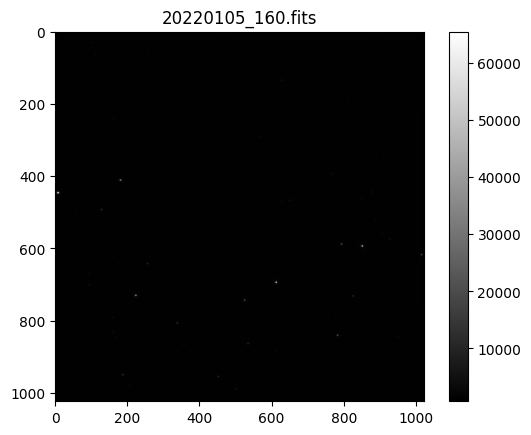

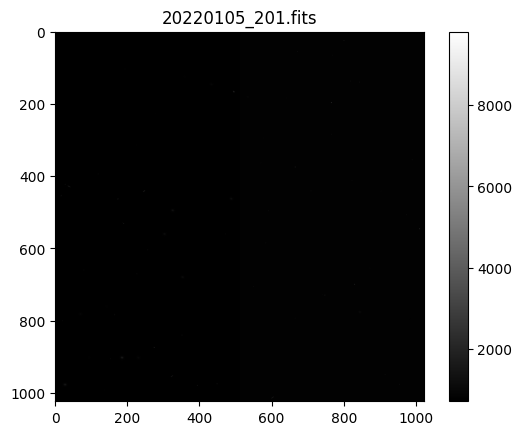

In [ ]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits

# Directory containing FITS images
directory = '/content/drive/MyDrive/UNPROCESSED DATA'

# List all FITS files in the directory
fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

# Loop through each FITS file
for fits_file in fits_files:
    # Open the FITS file
    fits_image_filename = os.path.join(directory, fits_file)
    hdul = fits.open(fits_image_filename)

    # Get the image data from the primary HDU
    image_data = hdul[0].data

    # Close the FITS file
    hdul.close()

    # Display the image using Matplotlib
    plt.figure()
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.title(fits_file)  # Use filename as the title
    plt.show()


In [ ]:
import os
from astropy.io import fits

def is_bias_frame(fits_file):
    try:
        with fits.open(fits_file) as hdul:
            im_style = hdul[0].header.get('IM_STYLE', '').lower()
            return 'bias' in im_style or 'zero' in im_style
    except Exception as e:
        print(f"Error processing {fits_file}: {e}")
        return False

def count_bias_frames(directory):
    bias_files = [f for f in os.listdir(directory) if f.endswith('.fits') and is_bias_frame(os.path.join(directory, f))]
    return len(bias_files)

# Example usage:
directory = '/content/drive/MyDrive/UNPROCESSED DATA'
bias_count = count_bias_frames(directory)
print(f"Number of bias frames found: {bias_count}")


Number of bias frames found: 15


In [ ]:
import os
from astropy.io import fits

def is_bias_frame(fits_file):
    try:
        with fits.open(fits_file) as hdul:
            im_style = hdul[0].header.get('IM_STYLE', '').lower()
            return 'bias' in im_style or 'zero' in im_style
    except Exception as e:
        print(f"Error processing {fits_file}: {e}")
        return False

def print_bias_frames(directory):
    bias_files = [f for f in os.listdir(directory) if f.endswith('.fits') and is_bias_frame(os.path.join(directory, f))]
    print("Bias frames found:")
    for bias_file in bias_files:
        print(bias_file)

# Example usage:
directory = '/content/drive/MyDrive/UNPROCESSED DATA'
print_bias_frames(directory)


Bias frames found:
20220105_205.fits
20220105_059.fits
20220105_211.fits
20220105_061.fits
20220105_212.fits
20220105_209.fits
20220105_203.fits
20220105_060.fits
20220105_210.fits
20220105_057.fits
20220105_206.fits
20220105_204.fits
20220105_207.fits
20220105_208.fits
20220105_058.fits


In [ ]:
import os
import numpy as np
from astropy.io import fits

def stack_bias_frames(source_directory):
    # List all bias files in the source directory
    bias_files = [f for f in os.listdir(source_directory) if f.endswith('.fits')]

    # Initialize a list to hold the bias frames
    bias_stack = []

    # Stack bias frames
    for bias_file in bias_files:
        fits_file = os.path.join(source_directory, bias_file)
        with fits.open(fits_file) as hdul:
            bias_data = hdul[0].data
            bias_stack.append(bias_data)

    # Convert the list to a numpy array
    bias_stack = np.array(bias_stack)

    return bias_stack

def compute_and_save_master_bias(source_directory, output_directory):
    # Stack bias frames
    bias_stack = stack_bias_frames(source_directory)

    # Compute the median of the stack to create the master bias
    master_bias = np.median(bias_stack, axis=0)

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Define the output file path
    output_file = os.path.join(output_directory, 'master_bias.fits')

    # Save the master bias to a FITS file
    hdu = fits.PrimaryHDU(master_bias)
    hdul = fits.HDUList([hdu])
    hdul.writeto(output_file, overwrite=True)

    print(f"Master bias saved to: {output_file}")

# Example usage:
source_directory = '/content/drive/MyDrive/UNPROCESSED DATA/biased_files'
output_directory = '/content/drive/MyDrive/UNPROCESSED DATA/master_biased'
compute_and_save_master_bias(source_directory, output_directory)


Master bias saved to: /content/drive/MyDrive/UNPROCESSED DATA/master_biased/master_bias.fits


In [ ]:
import os
import numpy as np
from astropy.io import fits

def compute_readout_noise(source_directory):
    # List all bias files in the source directory
    bias_files = [f for f in os.listdir(source_directory) if f.endswith('.fits')]

    # Initialize an empty list to hold the bias data arrays
    bias_data_list = []

    # Read bias frames and extract data arrays
    for bias_file in bias_files:
        fits_file = os.path.join(source_directory, bias_file)
        with fits.open(fits_file) as hdul:
            bias_data = hdul[0].data
            bias_data_list.append(bias_data)

    # Stack bias frames into a single 3D array (frames x rows x columns)
    bias_stack = np.stack(bias_data_list)

    # Compute the standard deviation along the stack axis to get the readout noise
    readout_noise = np.std(bias_stack, axis=0)

    return readout_noise

# Example usage:
source_directory = '/content/drive/MyDrive/UNPROCESSED DATA/biased_files'
readout_noise = compute_readout_noise(source_directory)
print(readout_noise)


[[3.76769897 5.23916872 4.37365852 ... 3.69984985 4.73943269 4.19311605]
 [5.8286648  4.33282048 6.02734509 ... 5.87045332 4.09009644 5.05788713]
 [5.34997404 4.13870619 5.45038225 ... 4.66857104 4.22374242 4.57238085]
 ...
 [5.1120772  5.47479071 5.36656315 ... 4.29262934 4.7777261  4.68282915]
 [5.50393798 5.03322296 5.31496838 ... 4.52842872 4.3695919  4.77027835]
 [5.28141395 5.02615382 4.78423336 ... 4.20792902 5.33166641 4.51466745]]


In [ ]:
import os
import numpy as np
from astropy.io import fits

def subtract_bias(image_data, master_bias_file):
    # Load the master bias data array from the FITS file
    with fits.open(master_bias_file) as hdul:
        master_bias_data = hdul[0].data

    # Subtract the master bias frame from the image data
    bias_subtracted_data = image_data - master_bias_data
    return bias_subtracted_data

def process_data_with_bias_subtraction(source_directory, destination_directory, master_bias_file):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # List all FITS files in the source directory
    fits_files = [f for f in os.listdir(source_directory) if f.endswith('.fits')]

    # Process each FITS file
    for fits_file in fits_files:
        input_path = os.path.join(source_directory, fits_file)
        output_path = os.path.join(destination_directory, fits_file)

        # Open the FITS file and read the data
        with fits.open(input_path) as hdul:
            image_data = hdul[0].data

        # Subtract the master bias from the image data
        bias_subtracted_data = subtract_bias(image_data, master_bias_file)

        # Write the bias-subtracted data to a new FITS file
        hdu = fits.PrimaryHDU(bias_subtracted_data)
        hdul = fits.HDUList([hdu])
        hdul.writeto(output_path, overwrite=True)

# Example usage:
source_directory = '/content/drive/MyDrive/UNPROCESSED DATA'
destination_directory = '/content/drive/MyDrive/UNPROCESSED DATA/bias_subtracted_images'
master_bias_file = '/content/drive/MyDrive/UNPROCESSED DATA/master_biased/master_bias.fits'
process_data_with_bias_subtraction(source_directory, destination_directory, master_bias_file)


In [ ]:
import os
from shutil import copyfile
from astropy.io import fits

def find_flat_field_images(directory):
    flat_files = []

    # Create a directory for flat images if it doesn't exist
    output_directory = os.path.join(directory, 'flat_images')
    os.makedirs(output_directory, exist_ok=True)

    # List all files in the directory
    files = os.listdir(directory)

    # Iterate over each file
    for file_name in files:
        # Check if the file is a FITS file
        if file_name.endswith('.fits'):
            file_path = os.path.join(directory, file_name)
            try:
                # Open the FITS file and read its header
                with fits.open(file_path) as hdul:
                    header = hdul[0].header
                    # Check if the image is a flat field image
                    if 'IM_STYLE' in header and 'flat' in header['IM_STYLE'].lower():
                        # Copy the file to the flat images directory
                        output_file_path = os.path.join(output_directory, file_name)
                        copyfile(file_path, output_file_path)
                        flat_files.append(output_file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return flat_files

# Example usage:
directory = '/content/drive/MyDrive/UNPROCESSED DATA 1'
flat_field_images = find_flat_field_images(directory)
print("Flat field images found and copied to flat_images directory:")
for image_path in flat_field_images:
    print(image_path)


Flat field images found and copied to flat_images directory:
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_001.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_014.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_012.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_002.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_004.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_003.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_005.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_011.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_013.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_017.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_018.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_019.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/20220105_015.fits
/co

In [ ]:
import os
from astropy.io import fits

def get_unique_filter_types(directory):
    # List all FITS files in the directory
    fits_files = [f for f in os.listdir(directory) if f.endswith('.fits')]

    # Collect filter types
    filter_types = set()
    for fits_file in fits_files:
        fits_path = os.path.join(directory, fits_file)
        with fits.open(fits_path) as hdul:
            filter_type = hdul[0].header.get('FILTER', '').strip()
            if filter_type:
                filter_types.add(filter_type)

    return filter_types

# Example usage:
directory = '/content/drive/MyDrive/UNPROCESSED DATA'
unique_filter_types = get_unique_filter_types(directory)
print("Unique filter types:", unique_filter_types)
print("Number of unique filter types:", len(unique_filter_types))


Unique filter types: {'V', 'B', 'R'}
Number of unique filter types: 3


In [ ]:
import os
from astropy.io import fits
import shutil

def filter_and_move_fits(source_directory, target_directory, filter_name):
    # Create target directory if it doesn't exist
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # List all FITS files in the source directory
    fits_files = [f for f in os.listdir(source_directory) if f.endswith('.fits')]

    # Process each FITS file
    for fits_file in fits_files:
        fits_path = os.path.join(source_directory, fits_file)
        with fits.open(fits_path) as hdul:
            flat_filter = hdul[0].header.get('FILTER', '').strip()  # Get the filter keyword
            if flat_filter == filter_name:  # Check if filter keyword is 'U'
                # Move the FITS file to the target directory
                shutil.move(fits_path, os.path.join(target_directory, fits_file))

# Example usage:
source_directory = '/content/drive/MyDrive/UNPROCESSED DATA'
target_directory = '/content/drive/MyDrive/UNPROCESSED DATA/fits_file_filtered_I'
filter_name = 'I'
filter_and_move_fits(source_directory, target_directory, filter_name)


In [ ]:
import os
import shutil
from astropy.io import fits

def separate_flats_by_filter(source_directory):
    # Create a dictionary to store flat images for each filter
    filter_directories = {}

    # List all files in the source directory
    files = os.listdir(source_directory)

    # Iterate over each file
    for file_name in files:
        # Check if the file is a FITS file
        if file_name.endswith('.fits'):
            file_path = os.path.join(source_directory, file_name)
            try:
                # Open the FITS file and read its header
                with fits.open(file_path) as hdul:
                    header = hdul[0].header
                    # Check if the image is a flat field image and has a FILTER keyword
                    if 'FILTER' in header:
                        filter_name = header['FILTER']
                        # Create a directory for the filter if it doesn't exist
                        filter_dir = os.path.join(source_directory, filter_name)
                        os.makedirs(filter_dir, exist_ok=True)
                        # Copy the file to the filter directory
                        shutil.copy(file_path, filter_dir)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Example usage:
source_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images'
separate_flats_by_filter(source_directory)


In [ ]:
import os
import numpy as np
from astropy.io import fits

def create_master_flat(flat_directory, output_directory):
    # List all flat files in the flat directory
    flat_files = [f for f in os.listdir(flat_directory) if f.endswith('.fits')]

    # Initialize a list to hold flat data
    flat_data = []

    # Read and stack flat images
    for flat_file in flat_files:
        fits_file = os.path.join(flat_directory, flat_file)
        with fits.open(fits_file) as hdul:
            flat_data.append(hdul[0].data)

    # Stack flat frames
    stacked_flat = np.median(flat_data, axis=0)

    # Normalize the master flat if necessary
    master_flat = stacked_flat / np.median(stacked_flat)

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Save the master flat to the output directory
    output_file = os.path.join(output_directory, 'master_flat.fits')
    hdu = fits.PrimaryHDU(master_flat)
    hdul = fits.HDUList([hdu])
    hdul.writeto(output_file, overwrite=True)
    print(f"Master flat saved to: {output_file}")

# Example usage:
flat_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/V'
output_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/master_flat_V'
create_master_flat(flat_directory, output_directory)


Master flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/master_flat_V/master_flat.fits


In [ ]:
import os

def delete_normalized_files(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Iterate through each file
    for file in files:
        if file.startswith('normalized_'):
            file_path = os.path.join(directory, file)
            # Remove the file
            os.remove(file_path)
            print(f"File deleted: {file_path}")

# Example usage:
directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images'
delete_normalized_files(directory)


File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_001.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_014.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_012.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_002.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_004.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_003.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_005.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_011.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_013.fits
File deleted: /content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/normalized_20220105_017.fits
File deleted: /content/drive/M

In [ ]:
import os
import numpy as np
from astropy.io import fits

def normalize_and_save_flat(flat_directory, output_directory):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # List all flat files in the flat directory
    flat_files = [f for f in os.listdir(flat_directory) if f.endswith('.fits')]

    # Normalize each flat image and save to the output directory
    for flat_file in flat_files:
        fits_file = os.path.join(flat_directory, flat_file)
        output_file = os.path.join(output_directory, flat_file)

        with fits.open(fits_file) as hdul:
            flat_data = hdul[0].data

            # Normalize flat image using a fixed exposure time of 7 seconds
            exposure_time = 7.0
            normalized_flat = flat_data / exposure_time

            # Save the normalized flat to the output directory
            hdu = fits.PrimaryHDU(normalized_flat)
            hdul = fits.HDUList([hdu])
            hdul.writeto(output_file, overwrite=True)
            print(f"Normalized flat saved to: {output_file}")

# Example usage:
flat_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1'
output_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat'
normalize_and_save_flat(flat_directory, output_directory)


Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_127.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_130.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_140.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_141.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_142.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_131.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_128.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_129.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_flat/20220105_135.fits
Normalized flat saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/normalized_fla

In [ ]:
import os
from astropy.io import fits

def flat_field_data(data_directory, master_flat_directory, output_directory):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # List all data files in the data directory
    data_files = [f for f in os.listdir(data_directory) if f.endswith('.fits')]

    # Iterate over each data file
    for data_file in data_files:
        data_path = os.path.join(data_directory, data_file)
        output_path = os.path.join(output_directory, data_file)

        # Open the data file
        with fits.open(data_path) as data_hdul:
            data = data_hdul[0].data

            # Extract filter information from the header if available
            filter_info = data_hdul[0].header.get('FILTER', None)

            # Determine the path to the corresponding master flat based on the filter
            master_flat_path = os.path.join(master_flat_directory, f'master_flat_{filter_info}.fits')

            # Open the corresponding master flat
            with fits.open(master_flat_path) as flat_hdul:
                master_flat = flat_hdul[0].data

                # Flat field the data by dividing with the master flat
                flat_fielded_data = data / master_flat

                # Save the flat-fielded data to the output directory
                fits.PrimaryHDU(flat_fielded_data, header=data_hdul[0].header).writeto(output_path, overwrite=True)
                print(f"Flat-fielded data saved to: {output_path}")

# Example usage:
data_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1'
master_flat_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/flat_images/master_flat'
output_directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files'
flat_field_data(data_directory, master_flat_directory, output_directory)


Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_127.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_130.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_140.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_141.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_142.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_131.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_128.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_processed_fits_files/20220105_129.fits
Flat-fielded data saved to: /content/drive/MyDrive/UNPROCESSED DATA 1/Final_proc